In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimization

In [3]:
data = pd.read_csv('IQ_info_288samples.csv')

In [4]:
data 

,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,time_per_channel
0,0,33,(87-48j),87,-48,99.362971,9.00,9.00
1,0,33,(61-78j),61,-78,99.020200,9.25,9.25
2,0,33,(28-93j),28,-93,97.123633,9.50,9.50
3,0,33,(-15-94j),-15,-94,95.189285,9.75,9.75
4,0,33,(-71+67j),-71,67,97.621719,11.00,11.00
...,...,...,...,...,...,...,...,...
21307,73,15,(6-18j),6,-18,18.973666,11537.75,149.75
21308,73,15,(-21+3j),-21,3,21.213203,11539.00,151.00
21309,73,15,(-19+10j),-19,10,21.470911,11539.25,151.25
21310,73,15,(-15+15j),-15,15,21.213203,11539.50,151.50


In [5]:
print(np.max(data['I']), np.max(data['Q']))

1194 1162


# Do the optimization

In [6]:
from scipy.optimize import least_squares
def s(theta, t ):
    x = theta[0] * np.sin(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

ts = data['time_per_channel']
Ai = 1; Aq = 1; fc = 2404.25*1e6; phi = 0;
ss = s([Ai, Aq, fc, phi], ts)
ss[0] += data['I']
ss[1] += data['Q']

def fun(theta):
    return (s(theta, ts) - ss).flatten()

theta0 = [0,0,0,0]
res2 = least_squares(fun, theta0)

In [7]:
res2

 active_mask: array([0., 0., 0., 0.])
        cost: 1087688994.7013226
         fun: array([-86.99999991, -61.00000008, -27.99999984, ..., -10.00013858,
       -14.99983694, -16.99996705])
        grad: array([-1.52434674, -0.34564203,  0.        ,  0.        ])
         jac: array([[-1.33514404e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.19209290e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.36034393e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.56641006e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.84416771e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -3.74317169e-05,  0.00000000e+00,
         0.00000000e+00]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 2
        njev: 2
  optimality: 1.5243467394489152
      status: 2
     success: True
           x: array([0.99327398, 0.115787

### Something new agian

In [8]:
print(res2.cost)

1087688994.7013226


In [9]:
N = int(len(res2.fun)/2)
N

21312

In [10]:
new_i = res2.fun[0:N]
new_q = res2.fun[N:len(res2.fun)]
print(max(new_i), max(new_q), min(new_i), min(new_q))

1207.0000002130662 1182.0000493056293 -1193.999999739445 -1161.999890483422


In [11]:
info_per_ant = []
N_ch = int(N/288)
print(N_ch)
for n in range(N_ch):
    for k in range(0 + n*288, 288*(n+1), 3):
        info_per_ant.append({"pkt": data['pkt'][k], 
                             "channel": data['Channel'][k], 
                             "I_ANT1": new_i[k+2],
                             "I_ANT2": new_i[k], 
                             "I_ANT3": new_i[k + 1],
                             "Q_ANT1": new_q[k+2],
                             "Q_ANT2": new_q[k], 
                             "Q_ANT3": new_q[k + 1],
                             "t_a1":data['time_per_channel'][k+2],
                             "t_a2":data['time_per_channel'][k],
                             "t_a3":data['time_per_channel'][k+1]})
result = pd.DataFrame(info_per_ant)
# result.to_csv('IQ_results_30.csv', index=False)

74


In [12]:
result

,pkt,channel,I_ANT1,I_ANT2,I_ANT3,Q_ANT1,Q_ANT2,Q_ANT3,t_a1,t_a2,t_a3
0,0,33,-28.000000,-87.000000,-61.000000,93.000021,48.000011,77.999989,9.50,9.00,9.25
1,0,33,37.000000,15.000000,71.000000,-92.999999,93.999999,-66.999977,11.25,9.75,11.00
2,0,33,-60.000000,-5.000000,-42.000000,102.999980,-103.999995,-95.000017,13.00,11.50,11.75
3,0,33,75.000000,-15.000000,34.000000,93.999995,123.000012,118.000017,13.75,13.25,13.50
4,0,33,-74.000000,32.000000,-26.000000,-104.999972,-120.999981,-123.000003,15.50,15.00,15.25
...,...,...,...,...,...,...,...,...,...,...,...
7099,73,15,10.000001,-80.000000,-34.000000,106.000133,77.999962,103.000048,145.75,145.25,145.50
7100,73,15,14.000001,87.999999,54.000002,-106.999914,-53.000085,-88.999784,147.50,147.00,147.25
7101,73,15,-14.000000,-32.000000,-25.999999,14.000039,-104.000044,8.000169,149.25,147.75,149.00
7102,73,15,21.000000,-9.000001,-6.000002,-3.000008,16.999909,17.999779,151.00,149.50,149.75


In [42]:
X12 = (result['I_ANT1'] + 1j*result['Q_ANT1']) * (result['I_ANT2'] - 1j*result['Q_ANT2'])
X23 = (result['I_ANT2'] + 1j*result['Q_ANT2']) * (result['I_ANT3'] - 1j*result['Q_ANT3'])
X13 = (result['I_ANT1'] + 1j*result['Q_ANT1']) * (result['I_ANT3'] - 1j*result['Q_ANT3'])

In [43]:
d = {'channel': result['channel'],'x12': X12, 'x23': X23, 'x13': X13}
xx = pd.DataFrame(data=d)
xx.to_csv('xx_30.csv', index=False)

In [44]:
w = []
for n in range(0,11):
    w.append(2404.25 + n*2)
for n in range(11, 37):
    w.append(2428.25 + (n-11)*2)

In [45]:
omegat = []
for i in range(37):
    channel_posi = np.where(xx['channel'] == i)
    channel_posi_arr = np.array(channel_posi)
    if np.any(channel_posi_arr) == True:
        xx['teta12'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x12']))*180/np.pi # c/f * xx * 1/2pi * 1/d
        xx['teta23'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x23']))*180/np.pi
        xx['teta13'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x13']))*180/np.pi
xx['dphi12']= np.angle(xx['x12'])*180/np.pi
xx['dphi23']= np.angle(xx['x23'])*180/np.pi
xx['dphi13']= np.angle(xx['x13'])*180/np.pi
xx.to_csv('xx_30.csv', index=False)

In [46]:
print(np.average(xx['dphi12']), np.average(xx['dphi23']), np.average(xx['dphi13'])/2)

-77.17361898599165 44.35481996884472 -23.782710319384268


In [47]:
print(np.average(xx['teta12']), np.average(xx['teta23']), np.average(xx['teta13'])/2)


-41.06519003322301 23.601836156480186 -6.327560710531707


In [25]:
phi_channel = []
for i in range(0, len(xx), 98):
    phi_channel.append({"channel":xx['channel'][i], 
                       "ave_phi12": np.average(xx['teta12'][i-98:i]),
                       "ave_phi23": np.average(xx['teta23'][i-98:i]), 
                       "ave_phi13": np.average(xx['teta13'][i-98:i])})
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
average_phi_perchannel

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13
1,12,-43.005506,24.763606,-9.120950
2,24,-31.579907,25.469881,-3.055013
3,25,-31.227463,25.211705,-3.007879
4,13,-32.747271,25.974723,-4.363627
5,36,-31.849773,25.999954,-13.675792
...,...,...,...,...
64,0,-34.157330,24.834343,-5.638847
65,24,-38.272441,25.788659,-6.241891
66,23,-30.944438,24.694538,-3.124950
67,11,-33.531839,25.813914,-3.858962


array([<AxesSubplot:>], dtype=object)

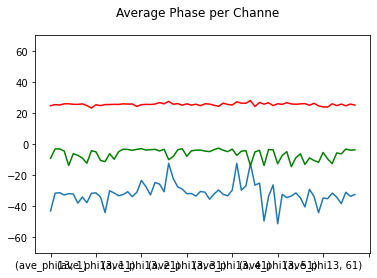

In [31]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-70,+70])
average_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'green')

array([<AxesSubplot:>], dtype=object)

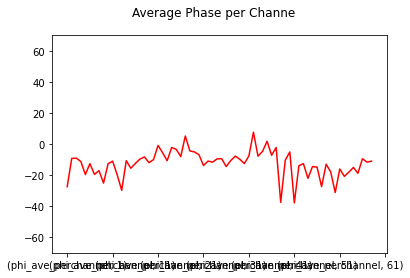

In [32]:
average_phi_perchannel['phi_ave_perchannel'] = (average_phi_perchannel['ave_phi12'] + average_phi_perchannel['ave_phi23'] + average_phi_perchannel['ave_phi13'])
average_phi_perchannel.unstack(level=0)[['phi_ave_perchannel']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'red')

In [33]:
from sklearn.cluster import KMeans

In [35]:
ave_phi_perchannel_2d = np.array([average_phi_perchannel['channel'], average_phi_perchannel['phi_ave_perchannel']])
ave_phi_perchannel_2d = np.transpose(ave_phi_perchannel_2d)
kmeans_ave_phi_perchannel_2d = KMeans(n_clusters=68).fit(ave_phi_perchannel_2d)
y_kmeans_ave_phi_perchannel_2d = kmeans_ave_phi_perchannel_2d.predict(ave_phi_perchannel_2d)
centers_ave_phi_perchannel_2d = kmeans_ave_phi_perchannel_2d.cluster_centers_

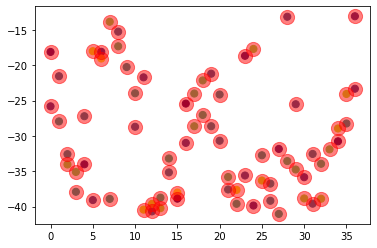

In [109]:
from matplotlib.pyplot import*
import matplotlib.pyplot as plt
plt.scatter(ave_phi_perchannel_2d[:, 0], ave_phi_perchannel_2d[:, 1], c=y_kmeans_ave_phi_perchannel_2d, s=50, cmap='viridis')
plt.scatter(centers_ave_phi_perchannel_2d[:, 0], centers_ave_phi_perchannel_2d[:, 1], c='red', s=200, alpha=0.5);

In [110]:
d1 = {'channel': ave_phi_perchannel_2d[:, 0],'ave_phi_perchannel_modified':centers_ave_phi_perchannel_2d[:, 1]}
sf = pd.DataFrame(data=d1)
sf

,channel,ave_phi_perchannel_modified
0,31.0,-38.879235
1,26.0,-25.428737
2,8.0,-30.765066
3,7.0,-18.119408
4,27.0,-34.020340
...,...,...
67,17.0,-40.432539
68,35.0,-18.009887
69,16.0,-37.638392
70,34.0,-19.049623


array([<AxesSubplot:>], dtype=object)

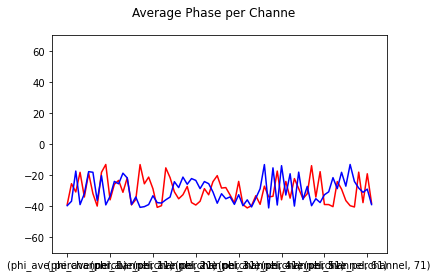

In [111]:
sf.unstack(level=0)[['ave_phi_perchannel_modified']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'red')
average_phi_perchannel.unstack(level=0)[['phi_ave_perchannel']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'blue')

In [112]:
np.average(sf['ave_phi_perchannel_modified'])

-30.05085631372026

In [46]:
def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))

In [63]:
xdata = np.transpose(np.array([[1.0,1.0,1.0,1.0,1.0,1.0],
              [0.0,1.0,2.0,3.0,4.0,5.0]]))
ydata = xdata[:,1] + 0.5
ydata

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [64]:
print (optimization.leastsq(func, x0, args=(xdata, ydata)))

ValueError: shapes (6,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)